# NLT practicum bij H4: Tijdsverschillen in HiSPARC

Dit Jupyter notebook hoort bij de NLT module "Kosmische straling" en vervangt het practicum van H4.

Een HiSPARC opstelling heeft (minstens) twee detectoren, die deeltjes meten. Een coincidentie vindt plaats als beide detectoren binnen 1500 ns een puls geven. Het tijdsverschil 1500 ns noemen we het 'trigger venster'.

Het doel van deze proef is te onderzoeken hoe de tijdsverschillen tussen de pulsen (binnen het 1500 ns trigger venster) verdeeld zijn.

In [1]:
import numpy as np
import tables
import matplotlib.pyplot as plt

from sapphire import download_data
from datetime import datetime

# Download de data

In [2]:
start = datetime(2019, 11, 12)
end = datetime(2019, 11, 13)

STATION = 104

In [3]:
# download data to HDF5 and read into memory. Close HDF5 file.
station_group = '/s%s' % STATION
with tables.open_file('data.h5', 'w') as data:
    download_data(data, station_group, STATION, start, end)
    event_tabel = data.get_node(station_group, 'events').read()

100%|###########################################################|Time:  0:00:05


## Event tabel

`event_tabel` is een array (tabel) van door het HiSPARC station vastgelegd events. Een event is een coincidentie, waarbij elke detector minstens een puls (deeltje) gemeten heeft.

Elke rij is een event. Elk event heeft een tijdsstempel (`timestamp`).
In de overige kolommen staan de gemeten grootheden, zoals de pulshoogte en aankomsttijden.

In [4]:
event_tabel

array([(    0, 1573516810, 891075134, 1573516810891075134, [ 88, 534,  -1,  -1], [  610,  6429,    -1,    -1], 0.22308, 2.2941 , -1., -1.,  65. ,  80. , -1., -1.,  80. ),
       (    1, 1573516812, 967711378, 1573516812967711378, [165,  71,  -1,  -1], [ 1541,   394,    -1,    -1], 0.56355, 0.14059, -1., -1., 517.5,  65. , -1., -1., 520. ),
       (    2, 1573516814, 103323797, 1573516814103323797, [612, 905,  -1,  -1], [ 7680, 10872,    -1,    -1], 2.8086 , 3.8795 , -1., -1.,  62.5,  67.5, -1., -1.,  70. ),
       ...,
       (32652, 1573603191, 677035060, 1573603191677035060, [177, 267,  -1,  -1], [ 1613,  2680,    -1,    -1], 0.58988, 0.95631, -1., -1.,  60. , 650. , -1., -1., 655. ),
       (32653, 1573603192, 592640211, 1573603192592640211, [212,  81,  -1,  -1], [ 2409,   517,    -1,    -1], 0.88097, 0.18448, -1., -1.,  62.5, 842.5, -1., -1., 847.5),
       (32654, 1573603198,  19065519, 1573603198019065519, [755,  64,  -1,  -1], [ 8482,   285,    -1,    -1], 3.1019 , 0.1017 , -1.,

## Tijdsverschillen

In de kolommen `t1` en `t2` staan de (relatieve) tijdstippen van de pulsen in het event. De tijden zijn te interpreteren als de aankomsttijden van de gemeten deeltjes.

We definieren `dt`: Het tijdsverschil tussen de pulsen.
`dt` is een rij van tijdsverschillen: Voor elk event een tijdsverschil.


In [5]:
t1 = event_tabel['t1']
t2 = event_tabel['t2']
dt = t2 - t1

In [6]:
dt

array([  15. , -452.5,    5. , ...,  590. ,  780. , -127.5], dtype=float32)

In [7]:
len(dt)  # lengte van de lijst dt (aantal elementen in de lijst)

32655

## Histogram van (aankomst)tijdverschillen

De tijdsverschillen `dt` kunnen we uitzetten in een histogram.

Het maximale tijdsverschil is dat ons HiSPARC station vastlegt is 1500 ns (triggervenster). 

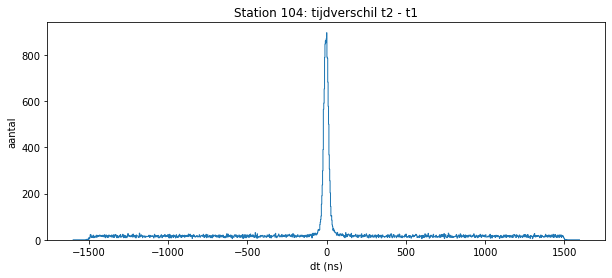

In [8]:
plt.figure(figsize=(10,4))
plt.hist(dt, bins=np.arange(-1600, 1600., 2.5), histtype='step')
plt.title('Station %d: tijdverschil t2 - t1' % STATION)
plt.xlabel('dt (ns)')
plt.ylabel('aantal')
plt.show()

## Piek nader bekeken

We maken een histogram van van de tijdsverschillen `dt` tussen -200 ns en 200 ns.

In deze plot is de piek van kleine tijdsverschillen veel beter te zien. 

Voor het tijdsverschil van gemeten pulsen (deeltjes) geldt:
 * Grote tijdsverschillen horen bij **toevallige coincidenties tussen deeltjes die NIET afkomstig zijn uit dezelfde shower**.
 * Kleine tijdsverschillen horen bij **coincidenties van deeltjes die afkomstig zijn uit dezelfde shower**.

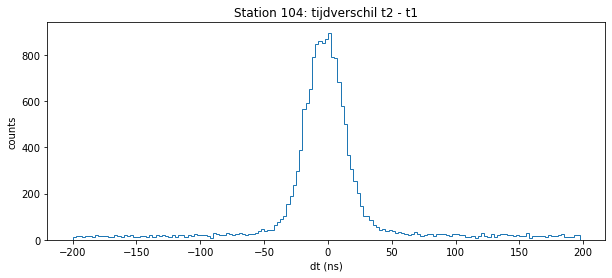

In [9]:
plt.figure(figsize=(10,4))
plt.hist(dt, bins=np.arange(-200, 200., 2.5), histtype='step')
plt.title('Station %d: tijdverschil t2 - t1' % STATION)
plt.xlabel('dt (ns)')
plt.ylabel('counts')
plt.show()

# Opgave 1

Maak een schatting van het aantal events waarin de deeltjes afkomstig zijn uit dezelfde shower. Gebruik het histogram.

In [10]:
# antwoord:


## Toevallige coincidenties

Door gebruik te maken van een logaritmische schaalverdeling kunnen we de toevallige coincidenties beter bekijken:

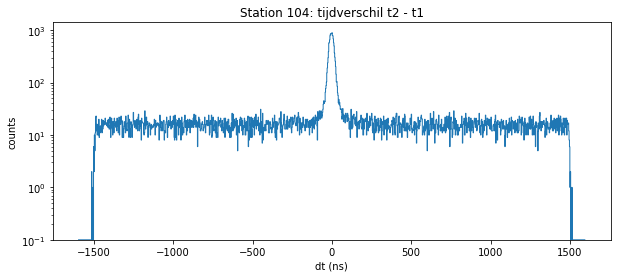

In [11]:
plt.figure(figsize=(10,4))
plt.hist(dt, bins=np.arange(-1600, 1600., 2.5), histtype='step', log=True)
plt.title('Station %d: tijdverschil t2 - t1' % STATION)
plt.xlabel('dt (ns)')
plt.ylabel('counts')
plt.show()

# Opgave 2

Maak een schatting van het aantal toevallige coincidenties. Gebruik het histogram met logaritmische schaalverdeling.


In [12]:
# antwoord

## tijdsverschillen selecteren 

We kunnen de tijdsverschillen uit de lijst `dt` selecteren. Op basis van de waarde van `dt`

In [13]:
dt[dt < 100.]  # alle elementen uit de lijst dt, die kleiner zijn dan 100   

array([   15. ,  -452.5,     5. , ..., -1062.5,   -10. ,  -127.5],
      dtype=float32)

# Opgave 3

- Maak een lijst van alle elementen uit `dt` die GEEN toevallige concidenties zijn: Noem de lijst `dt_shower`.
- Maak een lijst van alle elemeten uit `dt` die WEL toevallige coincidenties zijn: Noem de lijst `dt_toevallig`.
- Bereken het percentage toevallige coincidenties in deze dataset

In [14]:
# antwoord

In [15]:
## Extra pulshoogte van toev

In [16]:
shower_events = event_tabel[abs(dt) < 200.]
toevallige_coinc = event_tabel[abs(dt) >= 200.]

In [17]:
ph0_shower = shower_events['pulseheights'][:, 0]
ph1_shower = shower_events['pulseheights'][:, 1]
ph_coinc0 = toevallige_coinc['pulseheights'][:, 0]
ph_coinc1 = toevallige_coinc['pulseheights'][:, 1]

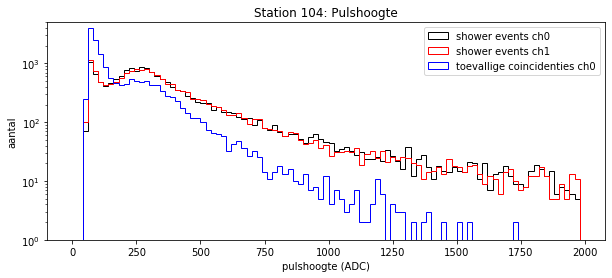

In [18]:
plt.figure(figsize=(10,4))
plt.hist(ph0_shower, bins=np.arange(0, 2000., 20), histtype='step', color='black', log=True)
plt.hist(ph1_shower, bins=np.arange(0, 2000., 20), histtype='step', color='red', log=True)
plt.hist(ph_coinc0, bins=np.arange(0, 2000., 20), histtype='step', color='blue', log=True)
#plt.hist(ph_coinc1, bins=np.arange(0, 2000., 20), histtype='step', color='blue', log=True)
plt.xlabel('pulshoogte (ADC)')
plt.title('Station %d: Pulshoogte' % STATION)
plt.ylabel('aantal')
plt.legend(['shower events ch0', 'shower events ch1', 'toevallige coincidenties ch0'])
plt.ylim([1, 5000])
plt.show()